In [1]:
%reload_ext autoreload
%autoreload 2

In [ ]:
DataManager.convert_section_to_z(

In [2]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

/home/yuncong/Brain/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages

Setting environment for Precision WorkStation


No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
stack = 'DmaleNanozoomer'

In [4]:
tb_dir = '/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/'
lossless_dir = '/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/'

In [5]:
from skimage.measure import label

Dmale_slide21_2018-02-02


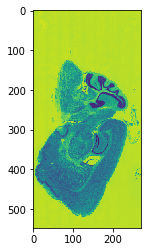

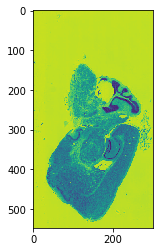

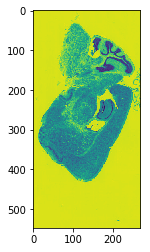

Dmale_slide23_2018-02-02


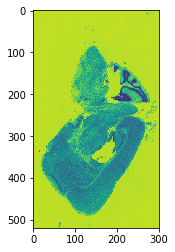

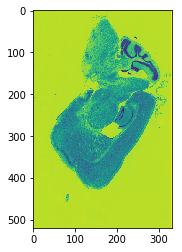

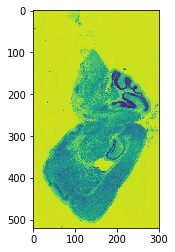

Dmale_slide25_2018-02-02


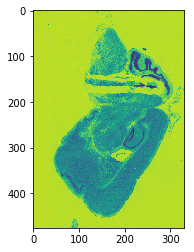

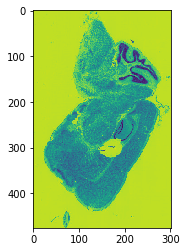

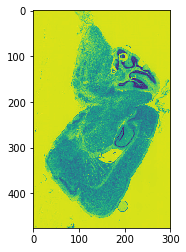

Dmale_slide27_2018-02-02


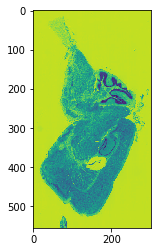

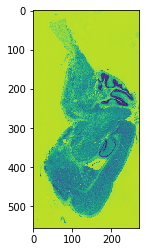

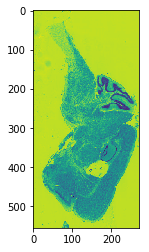

Dmale_slide29_2018-02-02


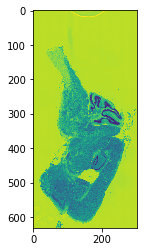

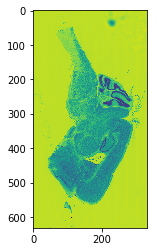

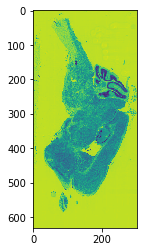

Dmale_slide31_2018-02-02


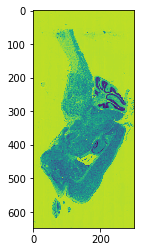

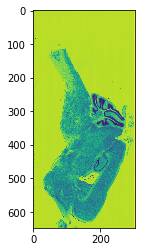

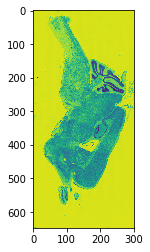

In [97]:
cropbox = {}
for fn in os.listdir(tb_dir):
    if '0.3125' in fn:
        fnn = '_'.join(fn.split('.')[0].split('_')[:3])
        cropbox[fnn] = []
        print fnn
        slide_tb = rgb2gray(imread(os.path.join(tb_dir, fn)))
        thresholded = (slide_tb < 0.96).astype(np.int)
        props = regionprops(label(thresholded))
        for prop in props:
            if prop.area > 10000:
                rmin, cmin, rmax, cmax = map(int, prop.bbox)
#                 print rmin, cmin, rmax, cmax, prop.area
                cropbox[fnn].append((cmin,rmin,cmax+1-cmin,rmax+1-rmin))
                plt.figure()
                plt.imshow(slide_tb[rmin:rmax+1, cmin:cmax+1])
                plt.show()

In [96]:
scale_factor =1 

for fn in os.listdir(tb_dir):
    if '0.3125' in fn:
        
        input_fp = os.path.join(tb_dir, fn)
        
        fnn = '_'.join(fn.split('.')[0].split('_')[:3])
        for i, (x,y,w,h) in enumerate(cropbox[fnn]):
            
            output_fp = '/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/%s-S%d_prep0_thumbnail.tif' % (fnn, i+1)
            create_parent_dir_if_not_exists(output_fp)
            
            cmd = "convert \"%(input_fp)s\" -virtual-pixel background -background %(bg_color)s -crop %(w)sx%(h)s%(x)s%(y)s\! -flatten -compress lzw -transverse \"%(output_fp)s\"" % \
            {'input_fp': input_fp,
             'output_fp': output_fp,
             'x': '+' + str(x * scale_factor) if int(x) >= 0 else str(x * scale_factor),
             'y': '+' + str(y * scale_factor) if int(y) >= 0 else str(y * scale_factor),
             'w': str(w * scale_factor),
             'h': str(h * scale_factor),
             'bg_color': 'white'}

            execute_command(cmd)
            upload_to_s3(output_fp)

convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide21_2018-02-02_x0.3125_z0.tif" -virtual-pixel background -background white -crop 271x549+0+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide21_2018-02-02-S1_prep0_thumbnail.tif"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide21_2018-02-02-S1_prep0_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide21_2018-02-02-S1_prep0_thumbnail.tif"
convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide21_2018-02-02_x0.3125_z0.tif" -virtual-pixel background -background white -crop 301x549+420+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide21_2018-02-02-S2_prep0_thumb

convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide29_2018-02-02_x0.3125_z0.tif" -virtual-pixel background -background white -crop 331x633+420+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide29_2018-02-02-S2_prep0_thumbnail.tif"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide29_2018-02-02-S2_prep0_thumbnail.tif" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide29_2018-02-02-S2_prep0_thumbnail.tif"
convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide29_2018-02-02_x0.3125_z0.tif" -virtual-pixel background -background white -crop 302x633+869+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_thumbnail/Dmale_slide29_2018-02-02-S3_prep0_thu

In [95]:
scale_factor = 64

for fn in os.listdir(lossless_dir):
    if 'x20' in fn:
        
        input_fp = os.path.join(lossless_dir, fn)
        
        fnn = '_'.join(fn.split('.')[0].split('_')[:3])
        for i, (x,y,w,h) in enumerate(cropbox[fnn]):
            
            output_fp = '/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_lossless/%s-S%d_prep0_lossless.tif' % (fnn, i+1)
            create_parent_dir_if_not_exists(output_fp)
            
            cmd = "convert \"%(input_fp)s\" -virtual-pixel background -background %(bg_color)s -crop %(w)sx%(h)s%(x)s%(y)s\! -flatten -compress lzw -transverse \"%(output_fp)s\"" % \
            {'input_fp': input_fp,
             'output_fp': output_fp,
             'x': '+' + str(x * scale_factor) if int(x) >= 0 else str(x * scale_factor),
             'y': '+' + str(y * scale_factor) if int(y) >= 0 else str(y * scale_factor),
             'w': str(w * scale_factor),
             'h': str(h * scale_factor),
             'bg_color': 'white'}

            execute_command(cmd)
#             upload_to_s3(output_fp)

convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide21_2018-02-02_x20_z0.tif" -virtual-pixel background -background white -crop 17344x35136+0+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_lossless/Dmale_slide21_2018-02-02-S0_prep0_lossless.tif"
convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide21_2018-02-02_x20_z0.tif" -virtual-pixel background -background white -crop 19264x35136+26880+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_lossless/Dmale_slide21_2018-02-02-S1_prep0_lossless.tif"
convert "/media/yuncong/BstemAtlasData/CSHL_data/DmaleNanozoomer/Dmale_slide21_2018-02-02_x20_z0.tif" -virtual-pixel background -background white -crop 17344x35136+59520+0\! -flatten -compress lzw -transverse "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_pr

# Crop

In [17]:
! cd /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_lossless/; rename 's/Dmale/DmaleNanozoomer/' *

In [6]:
tb_resol_um = XY_PIXEL_DISTANCE_LOSSLESS * 64

In [22]:
# These are 
cropbox = {
'DmaleNanozoomer_slide21_2018-02-02-S1': [214, 59, 214, 162],
'DmaleNanozoomer_slide21_2018-02-02-S2': [203,57,216,166],
'DmaleNanozoomer_slide21_2018-02-02-S3': [307,41,216,171],
'DmaleNanozoomer_slide23_2018-02-02-S1': [217,45,221,171],
'DmaleNanozoomer_slide23_2018-02-02-S2': [278,47,228,177],
'DmaleNanozoomer_slide25_2018-02-02-S1': [204,38,243,188],
'DmaleNanozoomer_slide25_2018-02-02-S2': [219,31,246,188],
'DmaleNanozoomer_slide25_2018-02-02-S3': [198,34,259,189],
'DmaleNanozoomer_slide27_2018-02-02-S1': [205,46,269,194],
'DmaleNanozoomer_slide27_2018-02-02-S2': [206,10,270,197],
'DmaleNanozoomer_slide27_2018-02-02-S3': [193,12,278,199],
'DmaleNanozoomer_slide29_2018-02-02-S1': [196,40,257,198],
'DmaleNanozoomer_slide29_2018-02-02-S2': [249,44,261,201],
'DmaleNanozoomer_slide29_2018-02-02-S3': [268,26,259,199],
'DmaleNanozoomer_slide31_2018-02-02-S1': [255,32,232,195],
'DmaleNanozoomer_slide31_2018-02-02-S2': [185,31,258,197],
'DmaleNanozoomer_slide31_2018-02-02-S3': [283,26,250,202]
}

In [23]:
filenames = cropbox.keys()

In [25]:
# Crop lossless

for fn in filenames[:1]:
    
    x,y,w,h = cropbox[fn]
    input_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=0, fn=fn)
    output_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=6, fn=fn)
    create_parent_dir_if_not_exists(output_fp)
    
    scale_factor = 64
    background_color = 'white'

    cmd = "convert \"%(input_fp)s\" -virtual-pixel background -background %(bg_color)s -crop %(w)sx%(h)s%(x)s%(y)s\! -flatten -compress lzw \"%(output_fp)s\"" % \
    {'input_fp': input_fp,
     'output_fp': output_fp,
     'x': '+' + str(x * scale_factor) if int(x) >= 0 else str(x * scale_factor),
     'y': '+' + str(y * scale_factor) if int(y) >= 0 else str(y * scale_factor),
     'w': str(w * scale_factor),
     'h': str(h * scale_factor),
     'bg_color': background_color}
    
    execute_command(cmd)
#     upload_to_s3(output_fp)

No vtk
No vtkNot using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.
Not using image_cache.


convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep0_lossless/DmaleNanozoomer_slide29_2018-02-02-S3_prep0_lossless.tif" -virtual-pixel background -background white -crop 16576x12736+17152+1664\! -flatten -compress lzw "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleNanozoomer/DmaleNanozoomer_prep6_lossless/DmaleNanozoomer_slide29_2018-02-02-S3_prep6_lossless.tif"
